Top Popular Dishes:
              Menu Item  Total_Orders  Avg_Rating  Avg_Recommendation_Score
0               Burger            17    2.764706                  0.535294
1                Pizza            12    2.416667                  0.609167
2  Chocolate Lava Cake            10    3.200000                  0.519000
3                Donut             7    3.428571                  0.528571
4            Croissant             4    3.500000                  0.410000


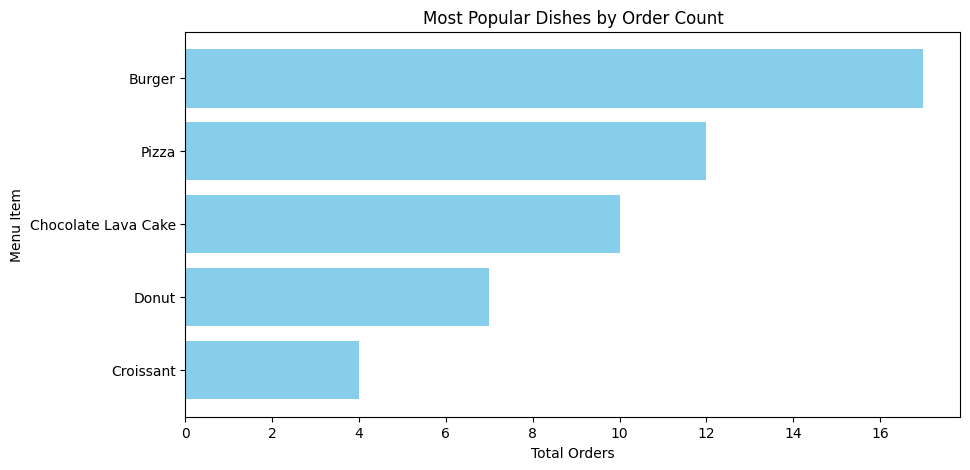

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv(r"C:\Users\ashis\Documents\AR_Menu.csv")

# Group by Menu Item and calculate popularity metrics
popularity_df = df.groupby("Menu Item").agg(
    Total_Orders=("Order ID", "count"),
    Avg_Rating=("Rating", "mean"),
    Avg_Recommendation_Score=("Recommendation Score", "mean")
).reset_index()

# Sort by Total Orders first, then by Avg Rating
popularity_df = popularity_df.sort_values(by=["Total_Orders", "Avg_Rating"], ascending=[False, False]).reset_index(drop=True)

# Display the top popular dishes
print("Top Popular Dishes:\n", popularity_df.head())

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(popularity_df['Menu Item'], popularity_df['Total_Orders'], color='skyblue')
plt.xlabel("Total Orders")
plt.ylabel("Menu Item")
plt.title("Most Popular Dishes by Order Count")
plt.gca().invert_yaxis()
plt.show()


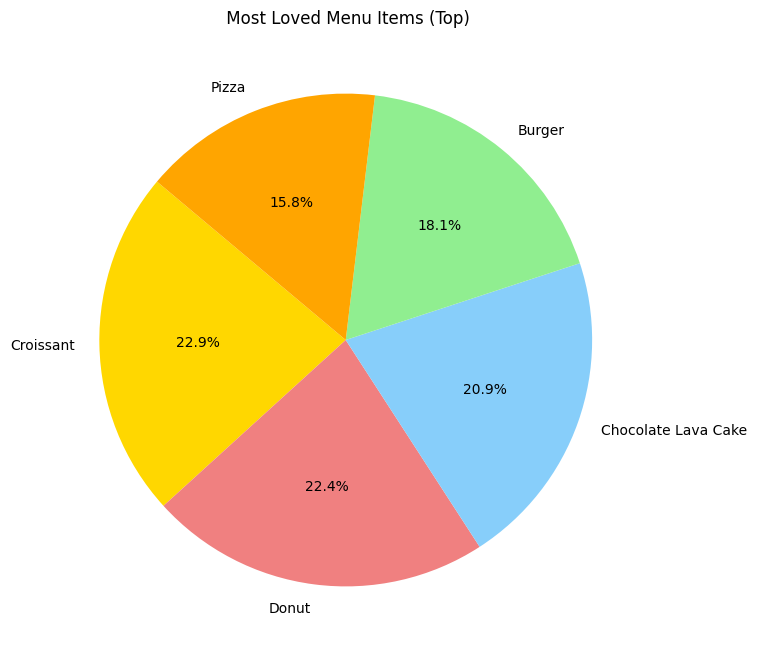

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")


top_items = df.groupby("Menu Item")["Rating"].mean().sort_values(ascending=False)[:5]

# ✅ Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange'])
plt.title(" Most Loved Menu Items (Top)")
plt.show()


Interpretation:

The pie chart shows that Croissant (22.9%) is the most loved item, followed by Donut (22.4%) and Chocolate Lava Cake (20.9%). Burger (18.1%) and Pizza (15.8%) are less favored. Desserts and baked goods are the top choices in terms of customer satisfaction.

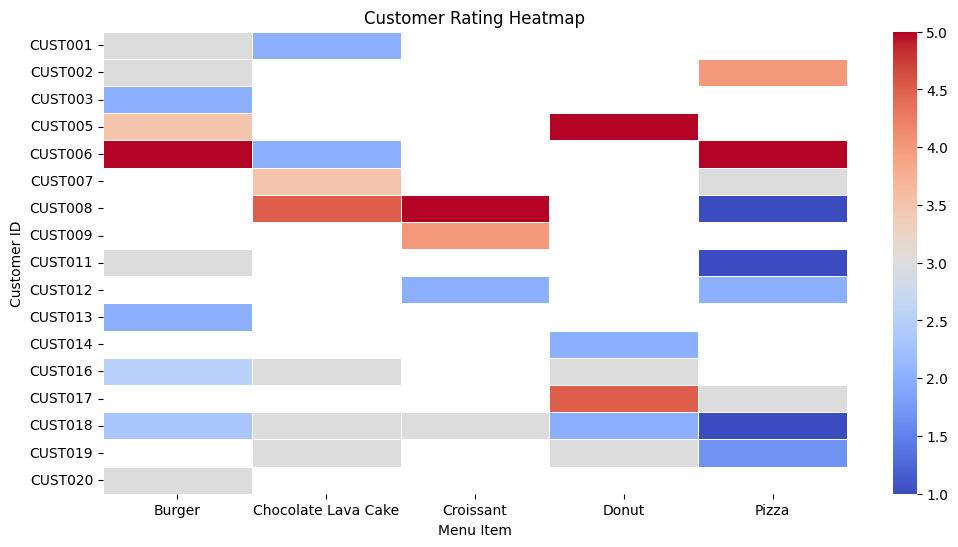

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for heatmap
pivot_df = df.pivot_table(index="Customer ID", columns="Menu Item", values="Rating", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, cmap="coolwarm", linewidths=0.5)
plt.title("Customer Rating Heatmap")
plt.xlabel("Menu Item")
plt.ylabel("Customer ID")
plt.show()


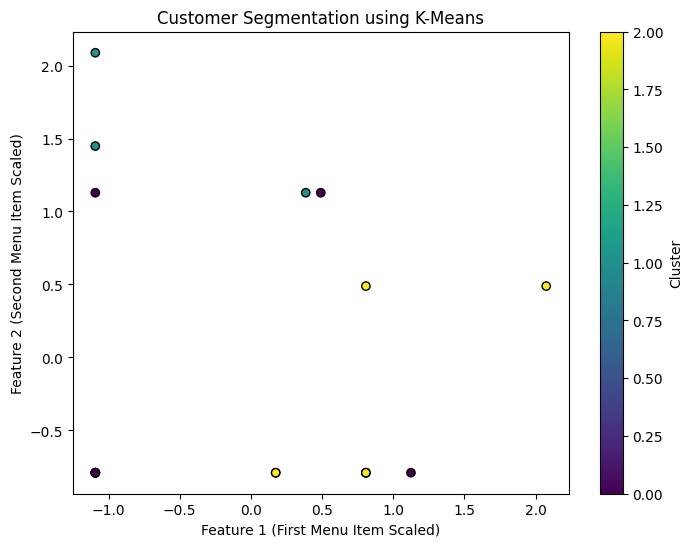

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Ensure unique customer records
customer_purchases = df.pivot_table(index="Customer ID", columns="Menu Item", values="Rating", fill_value=0)

# Step 2: Scale the data (important for clustering)
scaler = StandardScaler()
customer_purchases_scaled = scaler.fit_transform(customer_purchases)

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_purchases["Cluster"] = kmeans.fit_predict(customer_purchases_scaled)  # Assign clusters correctly

# Step 4: Merge cluster labels back to original df
df = df.merge(customer_purchases["Cluster"], on="Customer ID", how="left")

# Step 5: Scatter Plot for Clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_purchases_scaled[:, 0], customer_purchases_scaled[:, 1], c=customer_purchases["Cluster"], cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1 (First Menu Item Scaled)")
plt.ylabel("Feature 2 (Second Menu Item Scaled)")
plt.title("Customer Segmentation using K-Means")
plt.colorbar(label="Cluster")
plt.show()


Interpretation:
    
The K-Means segmentation shows three customer groups based on menu preferences:

1) Cluster 0 (Dark Purple): Customers with scattered preferences as they are more spread out.
2) Cluster 1 (Greenish-Blue): A smaller cluster with some similarity in choices.
3) Cluster 2 (Yellow): Most closely grouped, indicating a set of customers with highly similar ordering behavior.

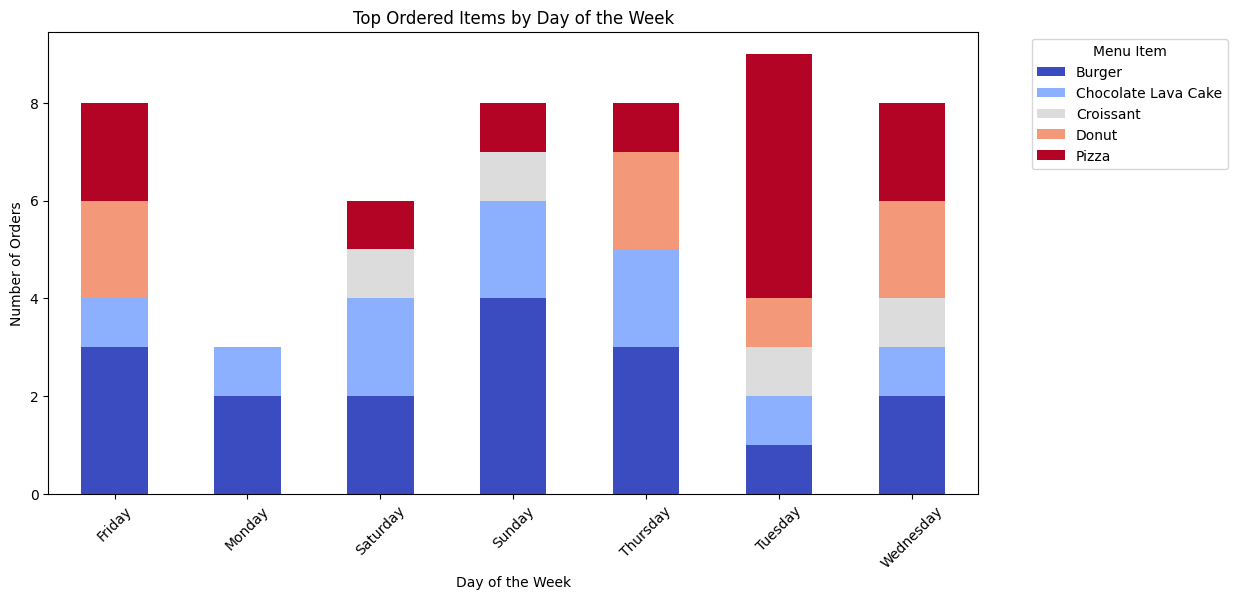

In [83]:
df["Order Date"] = pd.to_datetime(df["Order Date"])  # Ensure date format
df["Day"] = df["Order Date"].dt.day_name()  # Extract weekday

top_daywise_items = df.groupby(["Day", "Menu Item"])["Customer ID"].count().reset_index()
top_daywise_items = top_daywise_items.pivot(index="Day", columns="Menu Item", values="Customer ID")

top_daywise_items.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Top Ordered Items by Day of the Week")
plt.ylabel("Number of Orders")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.legend(title="Menu Item", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


  Interpretation: 
  
1) Tuesday has the highest total number of orders, with Pizza (Red) being the most ordered item.
2) Friday, Sunday, Thursday, and Wednesday have similar order volumes, with a mix of Burger (Dark Blue), Donut (Peach), and Pizza (Red).
3) Monday has the lowest number of orders.
4) Burger (Dark Blue) and Chocolate Lava Cake (Light Blue) are consistently ordered across most days.
5) Croissant (Gray) and Donut (Peach) show moderate but steady demand throughout the week.
6) Pizza (Red) is highly ordered on Tuesday and Friday, indicating peak demand for it on these days.

In [3]:
pip install nltk

     ---------------------------------------- 1.5/1.5 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 98.2/98.2 kB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     -------------------------------------- 274.0/274.0 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Load data
df = pd.read_csv(r"C:\Users\ashis\Documents\AR_Menu_with_Feedback.csv")

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["Sentiment Score"] = df["Feedback"].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on score
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral"))

print(df[["Feedback", "Sentiment"]])


                                             Feedback Sentiment
0          Just an average meal, expected a bit more.   Neutral
1           The quality didn’t match my expectations.   Neutral
2                One of the best meals I’ve had here!  Positive
3            Wouldn’t recommend it, lacked freshness.  Positive
4                   Pretty good, met my expectations.  Positive
5         Not a great experience, the food was stale.  Negative
6           Portion size was too small for the price.   Neutral
7             Decent taste but nothing extraordinary.   Neutral
8         Not a great experience, the food was stale.  Negative
9             Decent taste but nothing extraordinary.   Neutral
10            Decent taste but nothing extraordinary.   Neutral
11      Slightly underwhelming, wouldn’t order again.   Neutral
12             The flavor was lacking, not satisfied.  Negative
13       Not very fresh, expected more for the price.  Negative
14                      Tasted good, qui

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


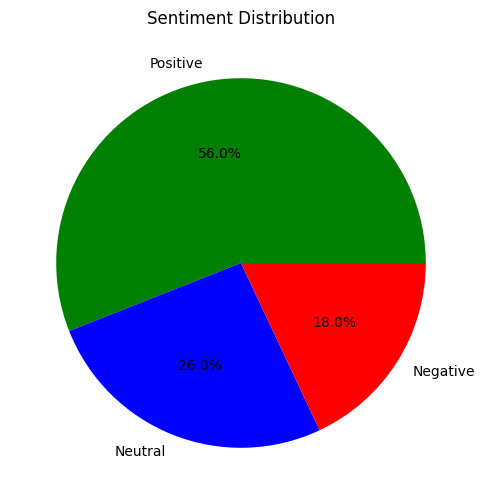

In [14]:
import matplotlib.pyplot as plt

# Count sentiment categories
sentiment_counts = df["Sentiment"].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=["green", "blue", "red"])
plt.title("Sentiment Distribution")
plt.show()


In [19]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load your dataset

df = pd.read_csv(r"C:\Users\ashis\Documents\AR_Menu_with_Feedback.csv")

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment category
def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df["Sentiment"] = df["Feedback"].apply(get_sentiment)

# Show sentiment distribution
print(df["Sentiment"].value_counts())




Positive    28
Neutral     13
Negative     9
Name: Sentiment, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ashis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
